In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
#pd.options.display.float_format = "{:.1f}".format

In [2]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
url = 'https://raw.githubusercontent.com/Amnuaysak/HomeWork_codecamp_5/master/logistic%20regression%20%26%20Chronic%20KIdney%20Disease%20dataset/kidney_disease.csv'
df = pd.read_csv(url)

df.drop(['id'],axis=1,inplace=True)

## Attribute Information: use 24 + class = 25 ( 11 numeric ,14 nominal)
1.Age(numerical)
*   age in years
2.Blood Pressure(numerical)
*   bp in mm/Hg
3.Specific Gravity(nominal) 
*   sg - (1.005,1.010,1.015,1.020,1.025)
4.Albumin(nominal) เป็นโปรตีนที่สร้างจากตับเป็นส่วนประกอบที่สำคัญของน้ำเหลืองของเลือด ระดับ albumin เป็นเป็นการบ่งบอกความสมดุลของการสร้างที่ตับและการขับ
*   al - (0,1,2,3,4,5)
5.Sugar(nominal)
*   su - (0,1,2,3,4,5)
6.Red Blood Cells(nominal)
*   rbc - (normal,abnormal)
7.Pus Cell (nominal)
*   pc - (normal,abnormal)
8.Pus Cell clumps(nominal)
*   pcc - (present,notpresent)
9.Bacteria(nominal)
*   ba - (present,notpresent)
10.Blood Glucose Random(numerical)
*   bgr in mgs/dl
11.Blood Urea(numerical)
*   bu in mgs/dl
12.Serum Creatinine(numerical)
*   sc in mgs/dl
13.Sodium(numerical)
*   sod in mEq/L
14.Potassium(numerical)
*   pot in mEq/L
15.Hemoglobin(numerical)
*   hemo in gms
16.Packed Cell Volume(numerical)
*   NaN
17.White Blood Cell Count(numerical)
*   wc in cells/cumm
18.Red Blood Cell Count(numerical)
*   rc in millions/cmm
19.Hypertension(nominal)
*   htn - (yes,no)
20.Diabetes Mellitus(nominal)
*   dm - (yes,no)
21.Coronary Artery Disease(nominal)
*   cad - (yes,no)
22.Appetite(nominal)
*   appet - (good,poor)
23.Pedal Edema(nominal)
*   pe - (yes,no)
24.Anemia(nominal)
*   ane - (yes,no)
25.Class (nominal)
*   class - (ckd,notckd)



2. เขียนโค้ดแสดง หัว10แถว ท้าย10แถว และสุ่ม10แถว


In [4]:
df.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.0,104.0,4.0,12.4,36,NaN,NaN,no,no,no,good,no,no,ckd
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.1,NaN,NaN,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.9,NaN,NaN,10.8,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [5]:
df.tail(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
390,52.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,99.0,25.0,0.8,135.0,3.7,15.0,52,6300,5.3,no,no,no,good,no,no,notckd
391,36.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,85.0,16.0,1.1,142.0,4.1,15.6,44,5800,6.3,no,no,no,good,no,no,notckd
392,57.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,133.0,48.0,1.2,147.0,4.3,14.8,46,6600,5.5,no,no,no,good,no,no,notckd
393,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,117.0,45.0,0.7,141.0,4.4,13.0,54,7400,5.4,no,no,no,good,no,no,notckd
394,50.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,137.0,46.0,0.8,139.0,5.0,14.1,45,9500,4.6,no,no,no,good,no,no,notckd
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd
399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,18.0,1.1,141.0,3.5,15.8,53,6800,6.1,no,no,no,good,no,no,notckd


In [6]:
df.sample(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
243,62.0,90.0,1.020,2.0,1.0,NaN,normal,notpresent,notpresent,169.0,48.0,2.4,138.0,2.9,13.4,47,11000,6.1,yes,no,no,good,no,no,ckd
350,65.0,70.0,1.025,0.0,0.0,NaN,NaN,notpresent,notpresent,85.0,20.0,1.0,142.0,4.8,16.1,43,9600,4.5,no,no,no,good,no,no,notckd
140,69.0,70.0,1.010,0.0,4.0,NaN,normal,notpresent,notpresent,256.0,40.0,1.2,142.0,5.6,NaN,NaN,NaN,NaN,no,no,no,good,no,no,ckd
356,34.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,87.0,38.0,0.5,144.0,4.8,17.1,47,7400,6.1,no,no,no,good,no,no,notckd
302,29.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,127.0,44.0,1.2,145.0,5.0,14.8,48,NaN,NaN,no,no,no,good,no,no,notckd
247,54.0,90.0,1.025,1.0,0.0,normal,abnormal,notpresent,notpresent,150.0,18.0,1.2,140.0,4.2,NaN,NaN,NaN,NaN,no,no,no,poor,yes,yes,ckd
252,45.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,82.0,49.0,0.6,147.0,4.4,15.9,46,9100,4.7,no,no,no,good,no,no,notckd
109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,233.0,50.1,1.9,NaN,NaN,11.7,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
254,51.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,99.0,38.0,0.8,135.0,3.7,13.0,49,8300,5.2,no,no,no,good,no,no,notckd
72,64.0,90.0,1.010,3.0,3.0,NaN,abnormal,present,notpresent,NaN,35.0,1.3,NaN,NaN,10.3,NaN,NaN,NaN,yes,yes,no,good,yes,no,ckd


**4. ใช้ info และ describe อธิบายข้อมูลเบื้องต้น**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [8]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


**5. ใช้ pairplot ดูความสัมพันธ์เบื้องต้นของ features ที่สนใจ**

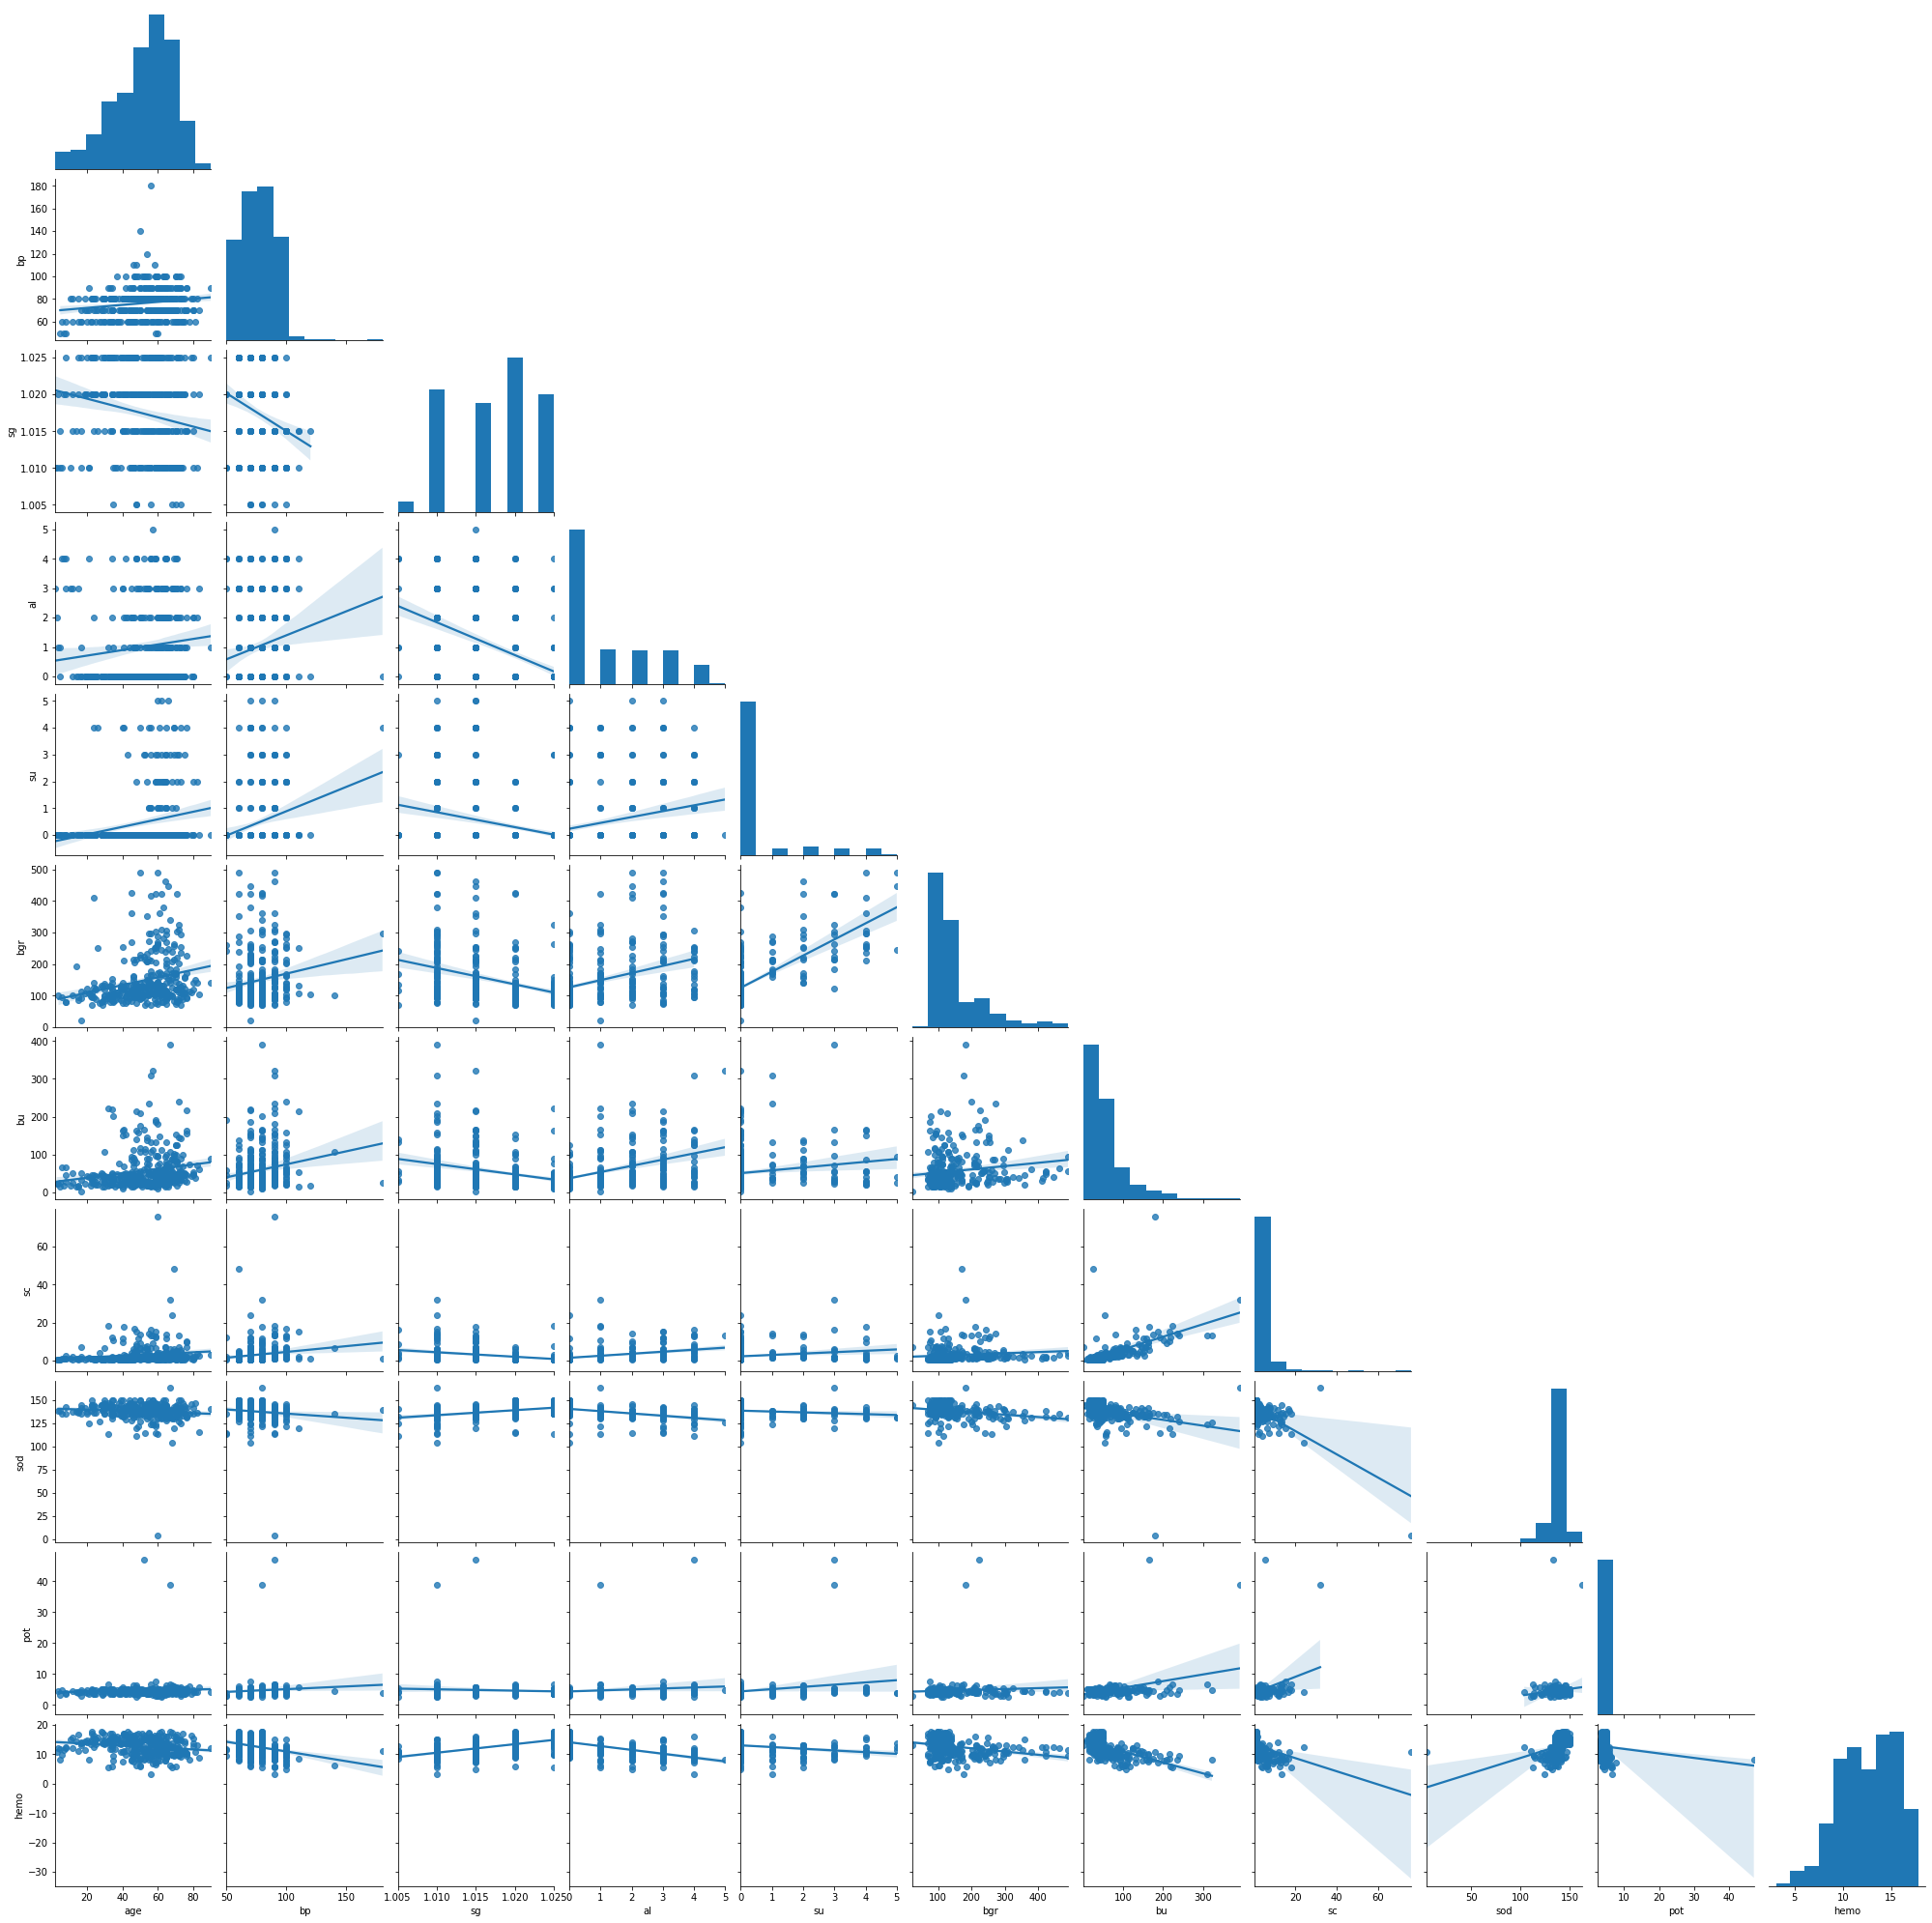

In [9]:
sns.pairplot(df,kind='reg',corner=True)

**3. เช็คว่ามีข้อมูลที่หายไปไหม สามารถจัดการได้ตามความเหมาะสม**

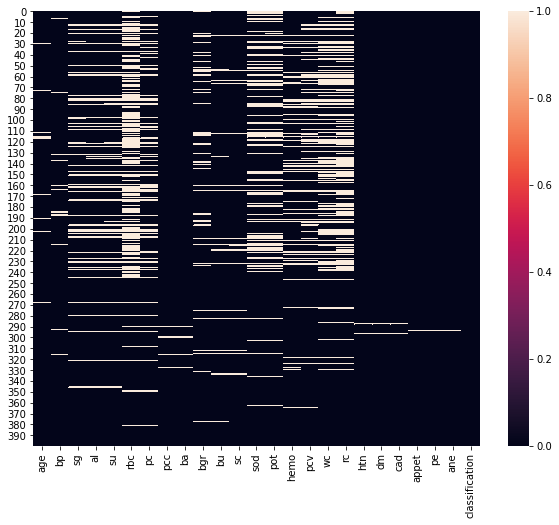

In [10]:
#หาข้อมูลที่เป็น null 
fig = plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

## Data Cleansing

In [11]:
df['rangeAge'] = pd.cut(df['age'],[0,10,20,30,40,50,60,70,80,90])
df.groupby('rangeAge').mean()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
rangeAge,,,,,,,,,,,
"(0, 10]",5.600000,54.000000,1.015556,2.444444,0.000000,87.750000,34.444444,0.977778,137.600000,3.980000,11.037500
"(10, 20]",16.000000,69.166667,1.018462,0.769231,0.000000,103.222222,26.500000,1.600000,138.200000,4.110000,13.892308
"(20, 30]",26.178571,72.592593,1.020556,0.222222,0.296296,120.296296,36.038462,1.226923,140.791667,4.308333,14.795455
"(30, 40]",35.575000,73.076923,1.020135,0.459459,0.108108,110.114286,52.157895,2.481579,139.228571,4.365714,13.258333
"(40, 50]",46.000000,77.792208,1.017887,0.797101,0.188406,136.211268,57.133333,2.831579,138.230769,4.412308,12.658571
"(50, 60]",56.359551,80.337079,1.016908,1.243590,0.545455,167.085366,63.001163,3.938953,134.904412,4.971642,12.275641
"(60, 70]",65.279070,76.823529,1.015513,1.256410,0.831169,170.371795,58.910843,3.702410,137.442623,4.998361,12.018667
"(70, 80]",74.047619,75.853659,1.016970,1.088235,0.696970,156.500000,71.200000,2.882927,137.857143,4.494286,12.205714
"(80, 90]",84.000000,75.000000,1.018333,2.000000,0.666667,132.250000,64.500000,2.775000,134.500000,4.550000,11.150000


In [12]:
df.groupby('rangeAge').count()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
rangeAge,,,,,,,,,,,,,,,,,,,,,,,,,
"(0, 10]",10,5,9,9,9,5,9,10,10,4,9,9,5,5,8,7,6,1,10,10,10,10,10,10,10
"(10, 20]",13,12,13,13,13,8,12,13,13,9,11,11,10,10,13,11,12,7,13,13,13,13,13,13,13
"(20, 30]",28,27,27,27,27,24,27,27,27,27,26,26,24,24,22,23,23,23,28,28,28,28,28,28,28
"(30, 40]",40,39,37,37,37,32,36,39,39,35,38,38,35,35,36,35,31,28,40,40,40,40,40,40,40
"(40, 50]",79,77,71,69,69,54,70,78,78,71,75,76,65,65,70,68,62,56,79,79,79,79,79,79,79
"(50, 60]",89,89,76,78,77,56,72,88,88,82,86,86,68,67,78,72,67,68,87,87,87,89,89,89,89
"(60, 70]",86,85,78,78,77,42,70,86,86,78,83,83,61,61,75,71,60,55,86,86,86,86,86,86,86
"(70, 80]",42,41,33,34,33,21,32,42,42,38,40,41,35,35,35,33,26,25,42,42,42,41,41,41,42
"(80, 90]",4,4,3,3,3,2,2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [0]:
df.drop(['rc','rbc','pc','pcc','sod','pot','wc','pcv','su','sg','hemo','bgr','al','rangeAge'],axis=1,inplace=True)
df['age'].fillna(df['age'].mean(),inplace=True)
df['bp'].fillna(df['bp'].mean(),inplace=True)
df['bu'].fillna(df['bu'].mean(),inplace=True)
df['sc'].fillna(df['sc'].mean(),inplace=True)
df.loc[df.age<5,"bp"] = 50

df.dropna(inplace=True)
#df.loc[df.rangeAge=="(0,10]","bp"] = df['rangeAge'] 
#df.loc[(df.age<5)&(df.bp<70),"bp"] = 50

In [14]:
df.head(5)

,age,bp,ba,bu,sc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,notpresent,36.0,1.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,notpresent,18.0,0.8,no,no,no,good,no,no,ckd
2,62.0,80.0,notpresent,53.0,1.8,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,notpresent,56.0,3.8,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,notpresent,26.0,1.4,no,no,no,good,no,no,ckd


**5. ใช้ pairplot ดูความสัมพันธ์เบื้องต้นของ features ที่สนใจ**

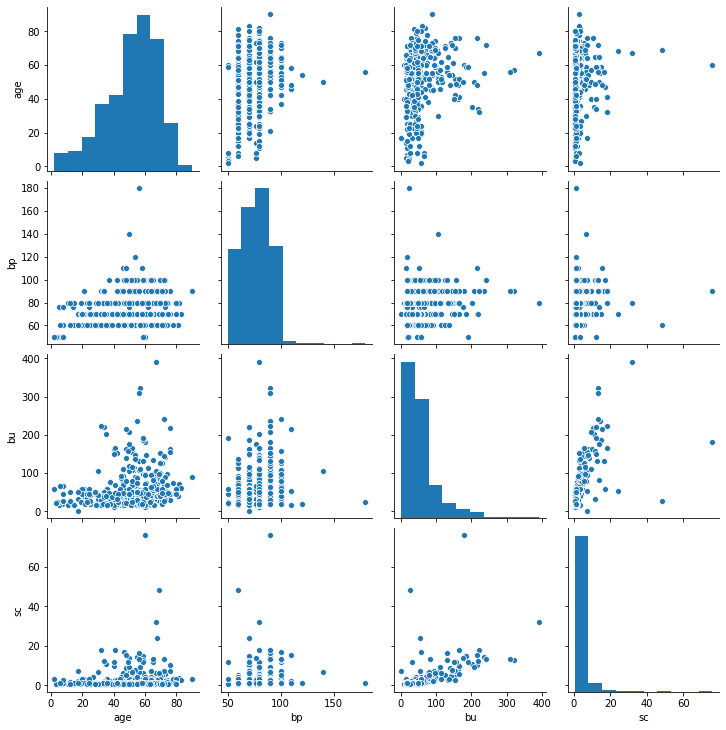

In [15]:
sns.pairplot(df,vars=['age','bp','bu','sc'])

**6. ใช้ displot เพื่อดูการกระจายของแต่ละคอลัมน์**

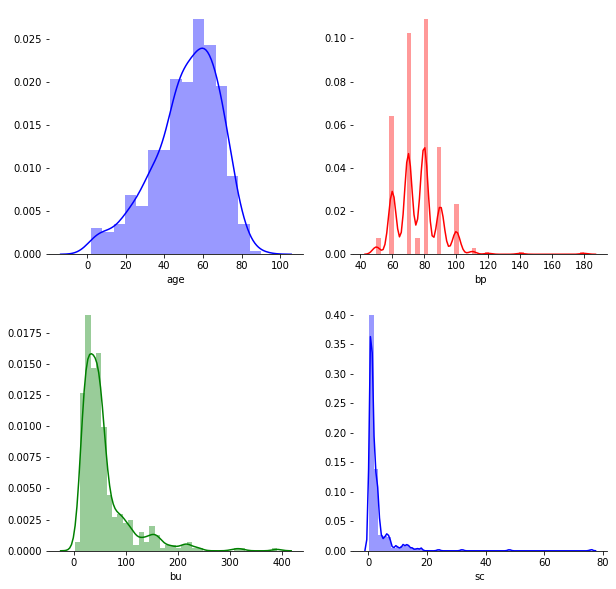

In [16]:
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=False)
sns.despine(left=True)

sns.distplot(df['age'], kde=True, color="b", ax=axes[0, 0])
sns.distplot(df['bp'], kde=True, color="r", ax=axes[0, 1])
sns.distplot(df['bu'], kde=True, color="g", ax=axes[1, 0 ])
sns.distplot(df['sc'], kde=True, color="b", ax=axes[1, 1])


**7. ใช้ heatmap ดูความสัมพันธ์ของคอลัมน์ที่สนใจ**

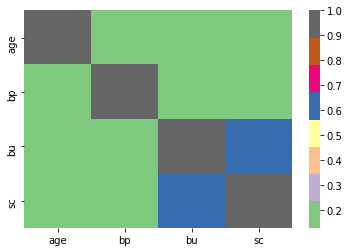

In [17]:
sns.heatmap(df.corr(),cmap='Accent')

**8. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation สูงสุด**

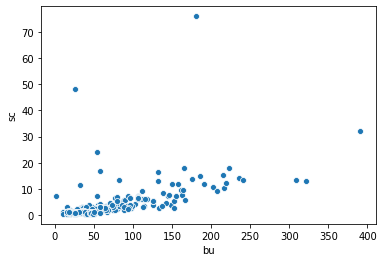

In [18]:
sns.scatterplot(x='bu',y='sc',data = df)

**9. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation ต่ำสุด**

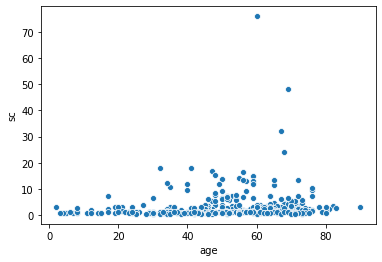

In [19]:
sns.scatterplot(x='age',y='sc',data = df)

**10. สร้าง histogram ของ feature ต่างๆที่สนใจ**

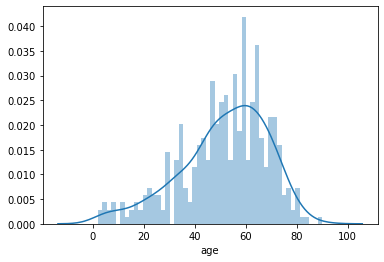

In [20]:
sns.distplot(df['age'],bins=50)

**11. สร้าง box plot ของ features ที่สนใจ**

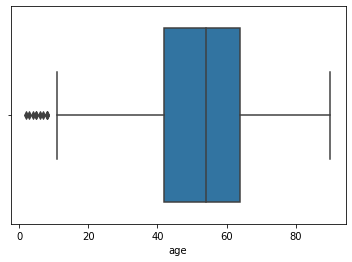

In [21]:
sns.boxplot(df['age'])

**13. ทำ Data Visualization อื่นๆ (แล้วแต่เลือก)**

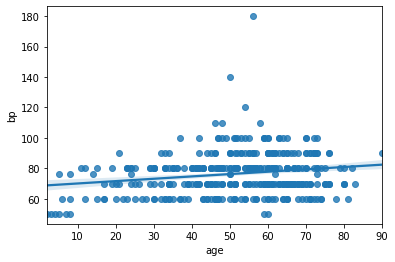

In [22]:
sns.regplot(df['age'], df['bp'], data=df)

14. ทำ Data Cleaning โดยการลบ หรือ fill average ขึ้นอยู่กับความเหมาะสม

15. เลือก features ที่สนใจนำมาเทรน และ เลือก features ทั้งหมด

In [0]:
ba = pd.get_dummies(df['ba'],drop_first=True)
htn = pd.get_dummies(df['htn'],drop_first=True)
dm = pd.get_dummies(df['dm'])
cad = pd.get_dummies(df['cad'])
appet = pd.get_dummies(df['appet'],drop_first=True)
pe = pd.get_dummies(df['pe'],drop_first=True)
ane = pd.get_dummies(df['ane'],drop_first=True)
classification = pd.get_dummies(df['classification'])

In [0]:
df.drop(['ba','htn','dm','cad','appet','pe','ane','classification'],axis=1,inplace=True)

In [0]:
dm = dm.iloc[:,1] + dm.iloc[:,2] + dm.iloc[:,4]
#cad = cad.iloc[:,0] + cad.iloc[:,1]
y = classification.iloc[:,0] + classification.iloc[:,1]

In [0]:
dm = pd.DataFrame(dm,columns=['dm_yes'])

In [0]:
ba.rename(columns={'present':'ba_present'}, inplace=True)
htn.rename(columns={'yes':'htn_yes'}, inplace=True)
appet.rename(columns={'poor':'appet_poor'}, inplace=True)
pe.rename(columns={'yes':'pe_yes'}, inplace=True)
ane.rename(columns={'yes':'ane_yes'}, inplace=True)

In [0]:
df = pd.concat([df,ba,htn,dm,appet,pe,ane],axis=1)
X = df

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# 12. สร้าง train/test split ของข้อมูล สามารถลองทดสอบ 70:30, 80:20, 90:10 ratio ได้ตามใจ

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state = 100)
LR = LogisticRegression()

In [31]:
LR.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_predict = LR.predict(X_test)

16. วัดผลโมเดล โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน
Accuracy,F1 score, Recall, Precision แล้วดูว่าแบบ features ที่เราเลือกมา กับ แบบเลือกทุก features แบบใดให้ผลลัพธ์ที่ดีกว่า

In [33]:
confusion_matrix(y_test,y_predict)

array([[24,  1],
       [ 5, 49]])

In [0]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict),precision_score(y_test,y_predict),recall_score(y_test,y_predict)

data = [[accuracy_score(y_test,y_predict),f1_score(y_test,y_predict),precision_score(y_test,y_predict),recall_score(y_test,y_predict)]]

table_data = pd.DataFrame(data,columns=['accuracy','f1','precision','recall'],index=['non standardize'])

**17. ทำ Standardize ข้อมูล features ทั้งหมดก่อนเทรนโมเดล**

In [0]:
sc_X = StandardScaler()
sc_y = StandardScaler()

In [0]:
X = df
#y= np.array([y]).T

X = sc_X.fit_transform(X)
#y = sc_y.fit_transform(y)

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state = 100)

In [0]:
LR = LogisticRegression()

In [38]:
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_predict = LR.predict(X_test)

In [40]:
confusion_matrix(y_test,y_predict)

array([[25,  0],
       [ 8, 46]])

In [0]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict),precision_score(y_test,y_predict),recall_score(y_test,y_predict)

data = [[accuracy_score(y_test,y_predict),f1_score(y_test,y_predict),precision_score(y_test,y_predict),recall_score(y_test,y_predict)]]

table_data2 = pd.DataFrame(data,columns=['accuracy','f1','precision','recall'],index=['standardize'])

table_data = table_data.append(table_data2)

18. วัดผลโมเดล โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน
Accuracy,F1 score, Recall, Precision แล้วดูว่าแบบไม่ standardize กับ แบบ
standardize แบบใดให้ผลลัพธ์ดีกว่า

19. เลือก features ที่สนใจ และทำ standardization, เทรนโมเดล, วัดผล และ
เปรียบเทียบกับข้อ 18

In [42]:
table_data

,accuracy,f1,precision,recall
non standardize,0.924051,0.942308,0.98,0.907407
standardize,0.898734,0.920000,1.00,0.851852
